In [56]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
%matplotlib inline


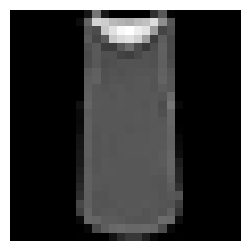

In [71]:
train_data = datasets.FashionMNIST("data", train=True, download=True)
fig = plt.figure(figsize=(3, 3))
plt.imshow(train_data[2][0], cmap='gray')
plt.axis('off')
plt.show()

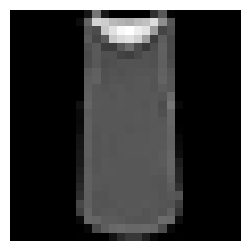

In [72]:
train_data = datasets.FashionMNIST("data", train=True, download=True, transform=ToTensor())
image_numpy = train_data[2][0].squeeze().numpy()
fig = plt.figure(figsize=(3, 3))
plt.imshow(image_numpy, cmap='gray')
plt.axis('off')
plt.show()

In [73]:
train_data = datasets.FashionMNIST("data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST("data", train=False, download=True, transform=ToTensor())

In [74]:
len(train_data), len(test_data)

(60000, 10000)

In [75]:
batch_size=64
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [76]:
for X, y in training_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [77]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [78]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [79]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [80]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [81]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [82]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297320  [   64/60000]
loss: 2.281429  [ 6464/60000]
loss: 2.270085  [12864/60000]
loss: 2.264790  [19264/60000]
loss: 2.237473  [25664/60000]
loss: 2.212374  [32064/60000]
loss: 2.221945  [38464/60000]
loss: 2.181164  [44864/60000]
loss: 2.186121  [51264/60000]
loss: 2.152483  [57664/60000]
Test Error: 
 Accuracy: 43.3%, Avg loss: 2.139516 

Epoch 2
-------------------------------
loss: 2.150755  [   64/60000]
loss: 2.134899  [ 6464/60000]
loss: 2.079759  [12864/60000]
loss: 2.102929  [19264/60000]
loss: 2.041062  [25664/60000]
loss: 1.977835  [32064/60000]
loss: 2.017787  [38464/60000]
loss: 1.921229  [44864/60000]
loss: 1.947846  [51264/60000]
loss: 1.868697  [57664/60000]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.857602 

Epoch 3
-------------------------------
loss: 1.895310  [   64/60000]
loss: 1.857084  [ 6464/60000]
loss: 1.739178  [12864/60000]
loss: 1.789746  [19264/60000]
loss: 1.672794  [25664/60000]
loss: 1.628891  [32064/600

In [83]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
